# Data Science - Previsão do nível de satisfação dos clientes do Santander

10 de agosto de 2021

![Santander](santander.png)

## 1. Definição do problema de negócio

O Banco Santander precisa identificar clientes insatisfeitos no início de seu relacionamento. Isso permitirá que ele tome medidas proativas para melhorar a satisfação de seus clientes antes que seja tarde demais, como, por exemplo, a inclusão em um programa de retenção, uma vez que clientes insatisfeitos raramente expressam sua insatisfação antes de sair.

### 1.1. Dataset

https://www.kaggle.com/c/santander-customer-satisfaction/data

### 1.2. Informações gerais

O *dataset* possui variáveis numéricas e anonimizadas. A coluna ***TARGET*** é a variável preditora, que possui as seguintes classes:

0. Clientes Satisfeitos
1. Clientes Insatisfeitos

Um dos grandes desafios deste *dataset*, e o que o deixa mais interessante, é que a anonimização realizada para proteger a privacidade dos clientes proporciona uma dificuldade a mais para se afirmar quais variáveis são relevantes ou não para o modelo preditivo, especialmente considerando o tamanho do conjunto de dados.

## 2. Carregamento dos dados

In [1]:
# importa bibliotecas gerais
import warnings
warnings.filterwarnings('ignore')
import itertools

# importa bibliotecas de preparação dos dados
import re
import numpy as np
import pandas as pd

# importa bibliotecas de visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# carrega os dados

train = pd.read_csv('train.csv')
test_features = pd.read_csv('test.csv')

In [3]:
# guarda testID para usar no dataset de envio ao Kaggle

testID = test_features['ID']

## 3. Análise exploratória dos dados

### 3.1. Análise dos dados de treino

Primeiramente, vamos dar uma olhada mais geral nos dados.

In [4]:
# informações gerais sobre o dataset de treino
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
# tipos de dados de cada coluna do dataset de treino
train.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [6]:
# mostra as quinze primeiras linhas do conjunto de dados de treino
train.head(15)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.00,195.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


In [7]:
# mostra as quinze últimas linhas do conjunto de dados de treino
train.tail(15)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
76005,151809,2,32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64250.460000,0
76006,151810,2,45,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
76007,151811,2,61,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83667.150000,1
76008,151813,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73056.000000,0
76009,151815,2,29,0.0,123.36,185.88,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176712.420000,0
76010,151816,2,25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165616.320000,0
76011,151818,2,55,0.0,64.89,64.89,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128887.380000,0
76012,151820,4,50,0.0,2.67,269.58,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
76013,151821,2,35,0.0,139.47,586.83,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31405.080000,0
76014,151825,2,39,0.0,375.99,405.33,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90214.170000,0


In [8]:
# visão geral da distribuição estatística dos dados de treino
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [9]:
# verifica o número de registros duplicados na coluna ID dos dados de treino
train['ID'].duplicated().sum()

0

In [10]:
# verifica o número de registros duplicados em todas as colunas dos dados de treino, excluindo a coluna ID
train.drop(columns='ID').duplicated().sum()

4807

In [11]:
# verifica quais são os 30 últimos registros duplicados em todas as colunas dos dados de treino, excluindo a coluna ID
train[train.drop(columns='ID').duplicated()].tail(30)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
75596,151003,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
75600,151011,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
75612,151039,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
75635,151085,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
75659,151133,2,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
75677,151161,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
75678,151166,2,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,1
75682,151177,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,1
75687,151189,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
75689,151194,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


Observando as informações acima, podemos dizer que:

- Todas as colunas já estão em formato numérico, o que quer dizer que não precisamos realizar a conversão de nenhum tipo de variável quantitativa;

- O *dataset* de treino conta com **76.020** registros e **371** variáveis, sendo **111** do tipo *float* e **260** do tipo *int*.

- Existem **4.807** registros duplicados ao excluir a coluna *ID*.

- Uma vez que se trata de dados anonimizados, inexistindo identificação em diversas variáveis, não há como concluir, com bom grau de certeza, que sua distribuição reflete o mundo real. Essa premissa irá ditar os rumos do tratamento que será realizado nos dados.

Considerando que tanto o *dataset* de treino quanto o de teste são relativamente grandes e não sabemos o que cada variável representa e como podem impactar o modelo de *machine learning*, precisamos selecionar as variáveis por três motivos:

- Saber quais variáveis trazem poderes de previsão mais relevantes ao modelo;
- Evitar usar variáveis que possam afetar negativamente a performance preditiva do modelo;
- Minimizar o custo computacional utilizando a quantidade mínima de variáveis para fornecer a melhor performance de processamento ao modelo.

### 3.2. Análise dos dados de teste

Vamos dar uma olhada mais geral nos dados de teste também.

In [12]:
# informações gerais sobre o dateset de teste
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [13]:
# tipos de dados de cada coluna do dataset de teste
test_features.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace2    float64
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
Length: 370, dtype: object

In [14]:
# mostra as quinze primeiras linhas do conjunto de dados de teste
test_features.head(15)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,73649.73
5,11,2,43,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,53250.87
6,12,2,39,495.0,2334.42,4815.42,0.0,0.0,0.0,0.0,...,0.0,7077.51,0.0,7599.0,7338.27,0.0,0.0,0.0,0.0,58316.64
7,15,2,29,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,46898.49
8,16,2,53,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,110356.98
9,17,2,37,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,41366.49


In [15]:
# mostra as quinze últimas linhas do conjunto de dados de teste
test_features.tail(15)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
75803,151812,2,26,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104517.090000
75804,151814,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53837.430000
75805,151817,2,32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182373.690000
75806,151819,2,30,0.0,0.00,555.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132168.480000
75807,151822,2,25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75513.300000
75808,151823,2,38,308.7,1586.94,1972.92,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36412.770000
75809,151824,2,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101250.330000
75810,151826,2,48,0.0,1500.00,1603.65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244200.870000
75811,151827,2,27,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37056.450000
75812,151828,2,42,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79361.880000


In [16]:
# visão geral da distribuição estatística dos dados de teste
test_features.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,...,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,75874.830581,-1579.955011,33.138832,83.164329,74.312894,123.136448,4.578517,7.666855,0.470645,0.672444,...,0.160595,12.438559,1.327408,17.469991,12.674349,63.597839,11.404505,95.973025,70.504319,1.173863e+05
std,43882.370827,39752.473358,12.932000,1694.873886,364.211245,606.431562,133.383326,239.701416,34.028605,42.336668,...,32.441677,958.651673,170.449935,1252.618781,895.165516,3754.668954,1061.858193,4658.871575,3318.527783,2.479384e+05
min,2.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.600000,-0.600000,0.000000,0.000000,0.000000,0.000000,1.202730e+03
25%,37840.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.754961e+04
50%,75810.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057643e+05
75%,113996.500000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.183159e+05
max,151837.000000,238.000000,105.000000,240000.000000,21093.960000,47943.960000,21093.960000,47943.960000,6600.000000,6600.000000,...,8030.160000,146605.320000,40080.600000,162355.800000,138054.960000,453893.400000,217762.230000,496198.080000,354260.730000,2.889440e+07


In [17]:
# verifica o número de registros duplicados na coluna ID dos dados de teste
test_features['ID'].duplicated().sum()

0

In [18]:
# verifica o número de registros duplicados em todas as colunas dos dados de teste, excluindo a coluna ID
test_features.drop(columns='ID').duplicated().sum()

4923

In [19]:
# verifica quais são os 30 últimos registros duplicados em todas as colunas dos dados de teste, excluindo a coluna ID
test_features[test_features.drop(columns='ID').duplicated()].tail(30)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
75344,150879,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75360,150912,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75368,150926,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75375,150939,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75435,151063,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75439,151069,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75452,151092,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75472,151132,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75474,151140,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75476,151142,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


Observando as informações acima, podemos dizer que:

- Todas as colunas já estão em formato numérico, o que quer dizer que não precisamos realizar a conversão de nenhum tipo de variável quantitativa;

- O *dataset* de teste conta com **75.818** registros e **370** variáveis (não possui a variável ***TARGET***), sendo **110** do tipo *float* e **260** do tipo *int*.

- Existem **4.923** registros duplicados ao excluir a coluna *ID*.

### 3.3. Verificação de valores *missing*

Um ponto importante é checar se há algum valor faltante (*missing*) nos *datasets* de treino e de teste.

In [20]:
# verificando se há algum valor faltante (missing) nos datasets de treino e de teste
train.isnull().sum().sum(), test_features.isnull().sum().sum()

(0, 0)

Podemos concluir que ambos os *datasets* não possuem valores faltantes.

## 4. Transformação dos dados

Inicialmente, iremos separar a variável *TARGET* do conjunto de treino e renomear as *features* de teste.

In [21]:
# separa coluna TARGET do restante do dataset de treino
train_features, train_target = train.drop('TARGET', axis = 1), np.array(train.TARGET).ravel()

Também iremos criar uma variável para identificar se os dados são de treino ou não, já que teremos que separar os dados novamente mais tarde.

In [22]:
# cria variável de identificação para o dataset conjunto
train_features['train'] = 1
test_features['train']  = 0

Por fim, vamos concatenar os conjuntos de dados, para que possamos remover as *features* desnecessárias.

In [23]:
total_features = pd.concat([train_features, test_features])

### 4.1. Removendo variáveis desnecessárias

Verificamos na análise exploratória que há uma coluna *ID*, utilizada para identificação. Essa coluna não contém informação relevante para nosso problema. Pelo contrário, uma vez que é do tipo *int*, pode atrapalhar quando forem feitos os testes com os modelos de *machine learning*.

Sendo assim, teremos que excluir essa coluna dos conjuntos de treino e de teste.

In [24]:
# exclui coluna 'ID' do dataset conjunto
total_features = total_features.drop('ID', axis = 1)

total_features.dtypes

var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
imp_op_var39_comer_ult3    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
train                        int64
Length: 370, dtype: object

Vamos verificar também se há variáveis cuja variância seja zero (colunas que contém valores constantes para todos os registros).

Teremos que excluir tais variáveis, já que não contêm nenhuma informação, apenas um valor exclusivo presente.

In [25]:
# loop para remoção de colunas constantes (que contenham variância zero no dataset conjunto)
remove = []
for col in total_features.columns:
    if total_features[col].var() == 0:
        remove.append(col)

total_features.drop(remove, axis=1, inplace=True)

print(total_features.shape[1])

336


Com esse filtro, **35** colunas foram removidas (incluindo a coluna "ID"). Assim, o conjunto de dados ficou mais enxuto sem perder poder preditivo, pois essas variáveis não adicionam informações que possam afetar a capacidade de classificação do modelo de *machine learning*.

Igualmente, precisamos remover colunas duplicadas, pois em nada acrescentam ao modelo.

In [26]:
# loop para remoção de colunas duplicadas
combinations = list(itertools.combinations(total_features.columns,2)) # pegamos todas as combinações de colunas
remove=[]
for f1,f2 in combinations: # encontramos todas as colunas que possuem os mesmos valores, mas que não possuem o mesmo nome
    if (f1 not in remove) & (f2 not in remove):
        if total_features[f1].equals(total_features[f2]):
            remove.append(f1)

total_features.drop(remove,axis=1,inplace=True)

total_features.shape[1]

309

Veja que removemos mais **27** colunas, que eram duplicadas.

### 4.2. Seleção de variáveis (*feature selection*)

Nós conseguimos reduzir bem o tamanho do *dataset* (de 370 para 309 variáveis), mas ainda podemos deixar nosso modelo mais eficiente.

Vamos estimar, então, a importância de cada variável.

Para isso, utilizaremos o método "*feature importances*" do algoritmo *ExtraTreesClassifier*. Esse método retorna um *score* para cada variável do conjunto de dados. Quanto maior o *score*, maior a importância da variável em relação à variável *TARGET*.

Precisaremos, então, separar nosso *dataset* de treino e de teste novamente e voltar com a variável *TARGET*.

In [27]:
# separa dataset conjunto em dados de treino e de teste
train_2 = total_features[total_features['train'] == 1].drop('train', axis = 1)

test_2 = total_features[total_features['train'] == 0].drop('train', axis = 1)

Agora, iremos separar o dataset de treino em arrays de entrada (*input*) e saída (*output*), para que referido modelo possa ser utilizado (*ExtraTreesClassifier*).

In [28]:
# separa o conjunto de dados de treino em input (X) e output (Y)
X = train_2
Y = train_target

Vamos, então, alimentar o modelo *ExtraTreesClassifier* com os arrays criados.



In [29]:
# importa biblioteca necessária
from sklearn.ensemble import ExtraTreesClassifier

# cria e treina o modelo
modelo = ExtraTreesClassifier(random_state=1279)
selector = modelo.fit(X, Y)

Agora vamos ver quais são as variáveis mais importantes.

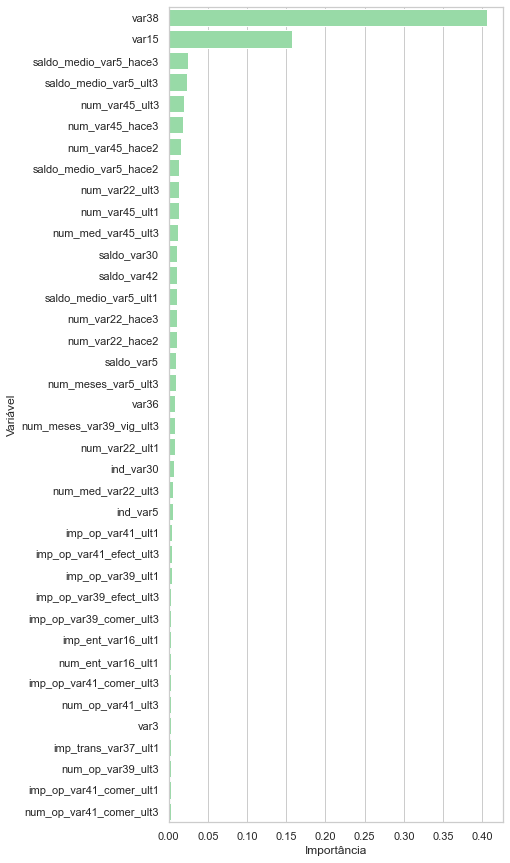

In [30]:
# converte o resultado do modelo em um dataframe
df = pd.DataFrame(X.columns,columns=['Variável'])
df['Importância'] = pd.DataFrame(modelo.feature_importances_.astype(float))

# ordena o resultado por score de importância (do maior para o menor)
resultado = df.sort_values('Importância', ascending=False)

# plota gráfico de barras que demonstra a importância das variáveis
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15)) # cria figura do matplotlib
sns.set_color_codes("pastel")
sns.barplot(x="Importância", y="Variável", data=resultado[:38], label="Total", color="g"); # plota o gráfico limitado às 38 variáveis mais importantes

In [31]:
# imprime a tabela de importância das variáveis limitada às mais importantes
print(resultado[:38])

                     Variável  Importância
307                     var38     0.406569
1                       var15     0.157502
269    saldo_medio_var5_hace3     0.024867
271     saldo_medio_var5_ult3     0.024114
267            num_var45_ult3     0.020052
265           num_var45_hace3     0.018998
264           num_var45_hace2     0.016373
268    saldo_medio_var5_hace2     0.013458
222            num_var22_ult3     0.012954
266            num_var45_ult1     0.012679
224        num_med_var45_ult3     0.012040
144               saldo_var30     0.011297
151               saldo_var42     0.011001
270     saldo_medio_var5_ult1     0.010795
220           num_var22_hace3     0.010639
219           num_var22_hace2     0.010465
129                saldo_var5     0.010081
225       num_meses_var5_ult3     0.009869
153                     var36     0.008703
234  num_meses_var39_vig_ult3     0.008144
221            num_var22_ult1     0.008039
51                  ind_var30     0.007228
223        

Como podemos ver na tabela, em que pese existirem muitas variáveis no *dataset*, são poucas as que aparentam ter importância relevante para o resultado.

Vamos, então, limitar nosso *dataset* às variáveis mais importantes.

In [32]:
from sklearn.feature_selection import SelectFromModel

# modelo.feature_importances_
fs = SelectFromModel(selector, prefit=True)
ix = fs.get_support()

train_3 = pd.DataFrame(fs.transform(train_2), columns = train_2.columns.values[ix])
test_3 = pd.DataFrame(fs.transform(test_2), columns = test_2.columns.values[ix])

print(train_3.shape)
print(test_3.shape)

(76020, 38)
(75818, 38)


Agora vamos verificar a correlação entre as variáveis.

Uma coisa que temos que ter em mente é que correlação não implica causalidade. Ou seja, não podemos confundir correlação com causa e efeito.

É interessante a análise das correlações entre variáveis porque são fenômenos aparentemente relacionados que acontecem ao mesmo tempo e podem suscitar perguntas a serem investigadas, mas elas não são, em si, respostas.

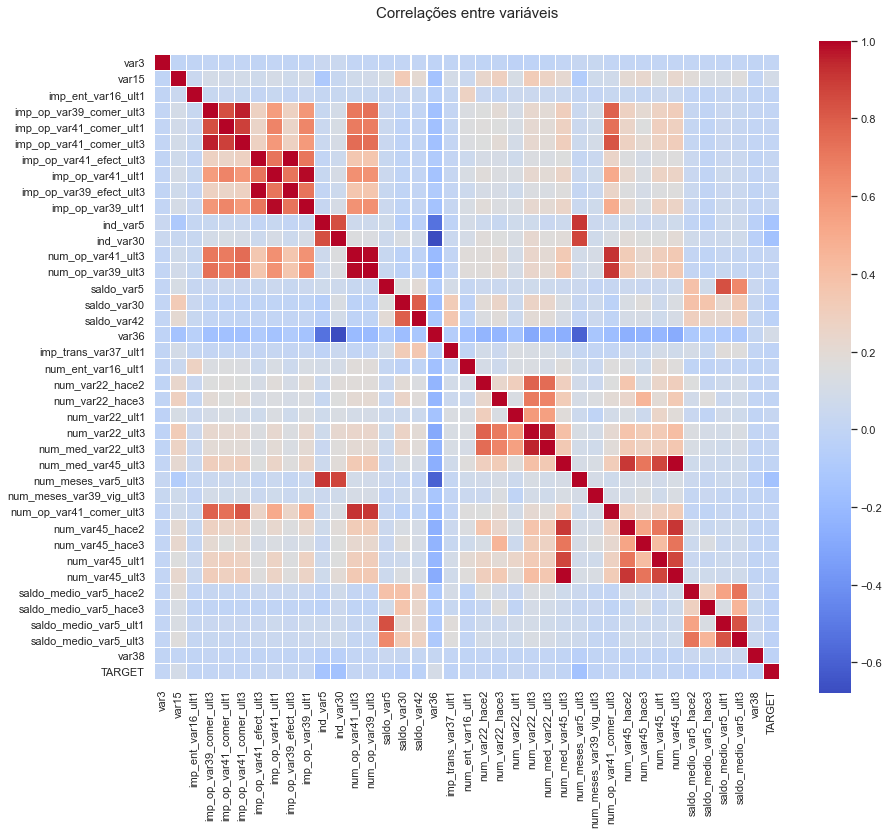

In [33]:
# retorna variável TARGET ao dataset de treino
train_3['TARGET'] = train_target

# plota heatmap de correlação entre dados númericos
plt.figure(figsize=(14,12))
plt.title('Correlações entre variáveis', y=1.05, size=15)
sns.heatmap(train_3.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1, vmax=1.0, square=True, linecolor='white');

Em nosso novo *dataframe* verificamos que a variável que possui maior *score* de importância em relação à variável *TARGET* é a ***var38***.

Vamos explorá-la um pouco mais.

In [34]:
# sumário estatístico da variável "var38"
train_3.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

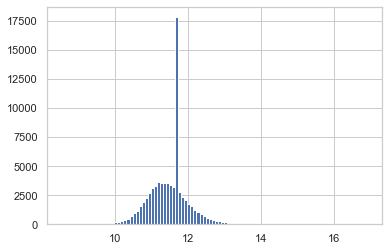

In [35]:
# histograma da variável "var38"
train_3.var38.map(np.log).hist(bins=100);

In [36]:
# Visualizando o valor mais comum da variavel "var38"
# O valor 117310.979016 aparece 14.868 vezes (bem maior que os demais valores)
train_3.var38.value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
                 ...  
318211.440000        1
73069.260000         1
36425.370000         1
163515.900000        1
159395.520000        1
Name: var38, Length: 57736, dtype: int64

Veja que há uma enorme discrepância em um valor específico da distribuição da variável *var38* (117310.979016).

In [37]:
# sumário estatístico da variável "var15"
train_3.var15.describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

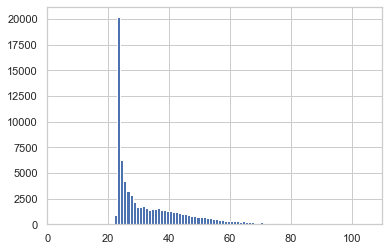

In [38]:
# histograma da variável "var15"
train_3['var15'].hist(bins=100);

Através desse histograma, podemos perceber uma enorme recorrência de um valor específico em relação aos outros na variável *var15*.

Considerando os valores da variável e sua distribuição, é possível que estejamos diante da idade dos clientes.

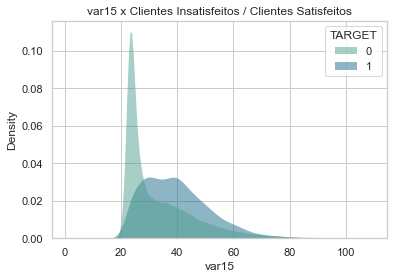

In [39]:
# gráfico de densidade da variável "var15" relacionada com a variável "TARGET"
sns.kdeplot(data=train_3, x="var15", hue="TARGET", fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0)

plt.title('var15 x Clientes Insatisfeitos / Clientes Satisfeitos');

Analisando esse gráfico de densidade, e considerando que a variável *var15* seja mesmo a idade dos clientes, podemos perceber que os clientes insatisfeitos possuem uma faixa de idade maior.

Agora, vamos ver um histograma de todas as variáveis que permaneceram.

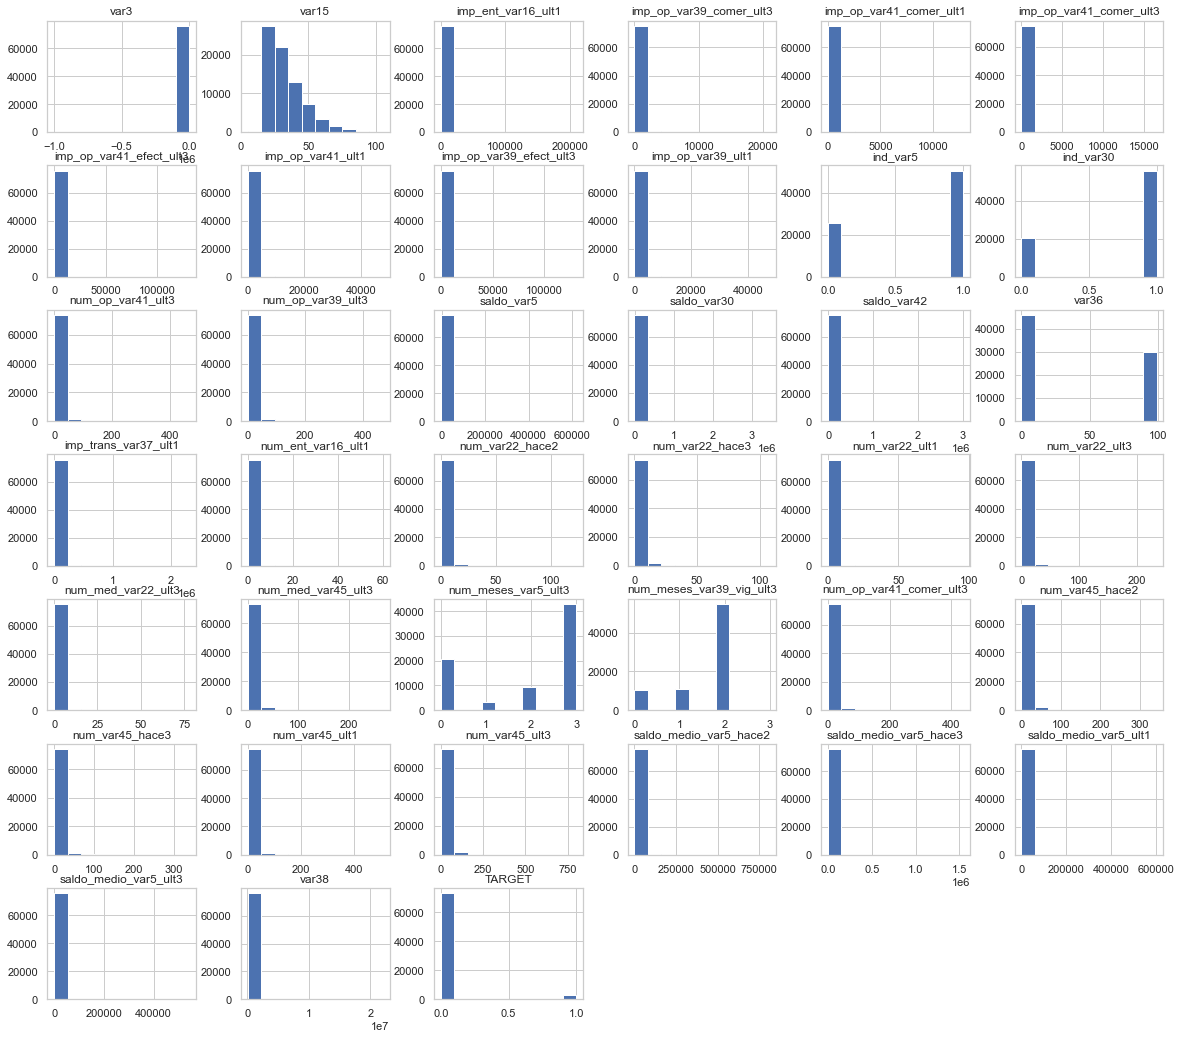

In [40]:
# histograma das variáveis numéricas do dataset de treino
train_3.hist(figsize=(20,18));

Nas variáveis exploradas mais especificamente, encontramos alguns valores *outliers*.

Vamos dar uma olhada mais aprofundada na quantidade de valores *outliers* que temos em nosso *dataset*.

In [41]:
# define função para detectar dados outliers
# retorna lista com os registros que possuem, pelo menos, duas variáveis que contêm valores outliers

from collections import Counter

def detect_outliers(df,n,features):

    outlier_indices = []
    
    # itera sobre as colunas
    for col in features:
        # 1o quartil (25%)
        Q1 = np.percentile(df[col], 25)
        # 3o quartil (75%)
        Q3 = np.percentile(df[col],75)
        # intervalo interquartil (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # cria lista de índices de outliers por coluna
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # insere o outlier da coluna a uma lista de outliers
        outlier_indices.extend(outlier_list_col)
        
    # seleciona linhas contendo mais de 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# detecta outliers
outliers_to_drop = detect_outliers(train_3,2,train_3.columns)

# mostra as linhas com valores outliers
train_3.loc[outliers_to_drop]

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,...,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38,TARGET
18,229.0,55.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,18.0,18.0,12.0,48.0,1.05,0.00,3860.16,1930.62,168943.230000,0
53,178.0,76.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,15.0,9.0,24.0,0.00,0.00,0.00,0.00,56913.060000,0
90,0.0,5.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,102074.610000,0
119,8.0,54.0,0.0,3444.42,2142.78,3444.42,0.0,2310.93,0.0,2310.93,...,48.0,36.0,39.0,123.0,403.65,280.65,3328.68,1337.67,89774.010000,0
127,3.0,31.0,0.0,2320.65,0.00,0.00,0.0,0.00,0.0,828.18,...,33.0,12.0,24.0,69.0,0.00,0.00,0.00,0.00,131774.970000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74486,2.0,47.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,3869.55,225.03,209.22,1434.60,69082.710000,0
4996,2.0,37.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,6.0,6.0,6.0,18.0,60.00,38.55,12322.20,4140.24,117310.979016,0
51000,2.0,42.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,3.0,0.0,3.0,14.73,7249.08,14.73,2426.19,347959.440000,0
67100,2.0,31.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,3.0,0.0,0.0,3.0,144.00,123.87,387.93,218.61,119442.270000,0


Foram encontrados mais de 24 mil registros com valores considerados *outliers*.

Remover todos os registros *outliers* reduziria dramaticamente o *dataset*, razão pela qual teremos que tratar esse problema utilizando algoritmos menos sensíveis a *outliers*.

Por fim, vamos verificar como está a proporção entre clientes satisfeitos e insatisfeitos no dataset de treino.

   TARGET          %
0   73012  96.043147
1    3008   3.956853


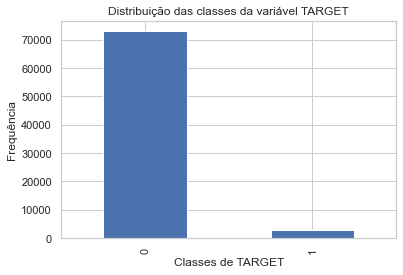

In [42]:
# mostra dataframe com quantidade de ocorrências e respectivo percentual das classes da variável TARGET
classes_target = pd.DataFrame(train_3['TARGET'].value_counts())
classes_target['%'] = 100*classes_target['TARGET']/train_3.shape[0]
print(classes_target)

# Histograma da distribuição das classes da variável TARGET
pd.value_counts(train_3['TARGET']).plot.bar()
plt.title('Distribuição das classes da variável TARGET')
plt.xlabel('Classes de TARGET')
plt.ylabel('Frequência')
plt.show()

Aqui vemos um problema de desbalanceamento de classes. Ou seja, o volume de uma das classes é muito maior do que o da outra.

Neste caso, podemos ver que existe uma nítida desproporção entre as classes de clientes insatisfeitos (3,96%) e de clientes satisfeitos (96,04%) no *dataset*.

Como estamos construindo um modelo de machine learning para classificação, a consequência desse desequilíbrio é que o modelo terá uma tendência a dar muitos "alarmes falsos", porque os algoritmos de aprendizado de máquina têm uma tendência para a classe majoritária e tendem a ignorar a classe minoritária. Eles tendem apenas a prever a classe majoritária e, portanto, apresentam grandes erros de classificação da classe minoritária em comparação com a classe majoritária.

Ou seja, se permanecer assim, na prática, ele irá realizar boas predições para as classes majoritárias, mas terá um desempenho inferior para as minoritárias.

Esse problema deve ser resolvido realizando engenharia de variáveis.

### Remoção de registros duplicados

Verificaremos agora a existência de linhas duplicadas após a exclusão da coluna "ID".

In [43]:
# verifica o número de registros duplicados
train_3.duplicated().sum()

4893

Veja que há **4.893** registros duplicados no *dataset* de treino.

A exclusão dos registros duplicados, quando estes reflem a distribuição desses dados no mundo real, poderia distorcer a probabilidade *a priori* de cada caso, afetando, principalmente, a utilização de métodos bayesianos, para os quais a frequência importa.

Se os dados de treinamento são uma amostra representativa do mundo real, então não queremos que essa distorção aconteça, porque, na verdade, estaríamos treinando um modelo para um mundo ligeiramente diferente (com probabilidades diferentes).

Contudo, como já dito anteriormente, não há como concluir, com absoluta certeza, que a distribuição da amostra fornecida reflete o mundo real, tendo em vista a pouca informação que temos sobre os dados.

Em virtude disso, como forma de evitar viés indevido no resultado por eventual *oversampling*, iremos remover os registros duplicados.

In [44]:
# elimina os registros duplicados do dataset de treino

train_3 = train_3.drop_duplicates()

train_3.shape[0]

71127

Pronto, nosso *dataset* de treino agora possui **71.127** registros únicos.

### 4.3. Engenharia de variáveis (*feature engineering*)

Para resolver o problema de *overfitting* da variável *TARGET*, teríamos duas opções:

- através de técnica de subamostragem (*undersampling*), excluindo exemplos excedentes da classe majoritária;
- através de técnica de superamostragem (*oversampling*), que consiste em sintetizar novos exemplos na classe minoritária.

Como a utilização de subamostragem acarretaria a perda de muitos dados importantes ao modelo, utilizaremos a técnica de superamostragem.

Utilizaremos um algoritmo para gerar dados sintéticos da classe minoritária, chamado ***SMOTE (Synthetic Minority Oversampling Technique)***.

O *SMOTE* sintetiza novas observações entre as observações existentes da classe minoritária. O algoritmo gera essas novas observações sintéticas por interpolação linear. São gerados pela seleção aleatória de um ou mais vizinhos mais próximos para cada observação na classe minoritária.

In [45]:
# importa biblioteca necessária
from imblearn.over_sampling import SMOTE

# separa o array em componentes de input e output
X = train_3.iloc[:,:-1]
Y = train_3.TARGET

# aplica o SMOTE
sm = SMOTE(random_state=0)
x_train, y_train = sm.fit_resample(X, Y)

np.bincount(y_train)

array([68322, 68322], dtype=int64)

Aplicado o algoritmo, vamos ver o resultado.

   TARGET     %
1   68322  50.0
0   68322  50.0


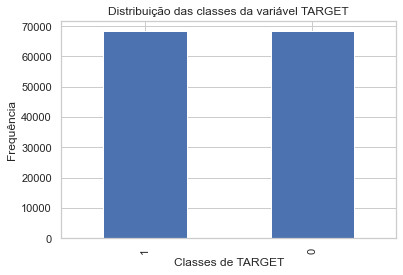

In [46]:
# mostra dataframe com quantidade de ocorrências e respectivo percentual das classes da variável TARGET após oversampling
classes_target = pd.DataFrame(y_train.value_counts())
classes_target['%'] = 100*classes_target['TARGET']/y_train.shape[0]
print(classes_target)

# Histograma da distribuição das classes da variável TARGET após oversampling
pd.value_counts(y_train).plot.bar()
plt.title('Distribuição das classes da variável TARGET')
plt.xlabel('Classes de TARGET')
plt.ylabel('Frequência')
plt.show()

Veja que, agora, cada classe conta com 73.012 registros (representando, cada uma, 50% do *dataset*).

Com as classes balanceadas, podemos passar para a implementação dos modelos de *machine learning*.

## 5. Implementando modelos de Machine Learning

In [47]:
# importa bibliotecas gerais para avaliação dos modelos de machine learning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Inicialmente, para avaliar a capacidade de generalização dos modelos de *machine learning* utilizaremos a técnica de *cross-validation*.

Para isso, utilizaremos o algoritmo ***KFold***. O que ele faz é dividir um dataset em "*k*" conjuntos de treino e teste, usando o conjunto de treino para treinar o modelo e o conjunto de teste para avaliar quão bom o modelo generaliza para dados que ele ainda não viu.

Em cada uma das "*k*" vezes, testa-se o modelo com um *fold* diferente, calculando a métrica escolhida para avaliação do modelo.

Ao final do processo, teremos "*k*" medidas da métrica de avaliação escolhida, com as quais calculamos a média e o desvio-padrão.

Para utilizar o algoritmo, temos que definir em quantas partes dividir e quantas vezes treinar e avaliar o nosso modelo (*número de folds*).

In [48]:
# definindo o valor para o número de folds (10)
kfold = KFold(n_splits = 10)

### 5.1. XGBoost

XGBoost é a abreviação de “eXtreme Gradient Boosting”. O “eXtreme” refere-se a melhorias de velocidade, como computação paralela e reconhecimento de cache, que torna o XGBoost bem mais rápido do que o Gradient Boosting tradicional. Além disso, o XGBoost inclui um algoritmo de localização de divisão exclusivo para otimizar árvores, junto com a regularização integrada que reduz o sobreajuste. De modo geral, o XGBoost é uma versão mais rápida e precisa do Gradient Boosting.

In [49]:
# importa biblioteca de XGB
import xgboost as xgb

# cria modelo XGB
xgb_model = xgb.XGBClassifier(n_estimators=110, max_depth = 4, seed=1279, verbosity = 0)

# analisa a acurácia do modelo XGB com kfold
xgb_cv_results = cross_val_score(xgb_model, x_train, y_train, cv = kfold, scoring = 'accuracy')
msg = "Acurácia do modelo XGB (kfold): %f (%f)" % (xgb_cv_results.mean(), xgb_cv_results.std())
print(msg)

Acurácia do modelo XGB (kfold): 0.967046 (0.022483)


In [50]:
colunas = train_3.columns.tolist()

colunas = colunas[:-1]

x_test = test_2[colunas]

Agora vamos treinar nosso modelo.

In [51]:
xgb_model.fit(x_train, y_train, eval_metric="auc", verbose = False)
predictions = xgb_model.predict_proba(x_test);

### 5.2. Avaliações Adicionais

Agora iremos usar alguns métodos para avaliar melhor nosso modelo.

O primeiro deles será a matriz de confusão.

A matriz de confusão é uma tabela frequentemente usada para descrever o desempenho de um modelo de classificação (ou "classificador") em um conjunto de dados de teste para os quais os valores verdadeiros são conhecidos.

A primeira linha da matriz é sobre as predições dos clientes satisfeitos:
- em [0,0] temos passageiros que foram classificados corretamente como satisfeitos (chamados de verdadeiros negativos);
- em [0,1] temos passageiros que foram erroneamente classificados como satisfeitos (falsos negativos).

A segunda linha da matriz é sobre as previsões dos clientes não satisfeitos:
- em [1,0] temos passageiros classificados erroneamente como não satisfeitos (falsos positivos);
- em [1,1] temos passageiros corretamente classificados como não satisfeitos (positivos verdadeiros).

In [52]:
# cria matriz de confusão

# importa bibliotecas de Cross Validation e Confusion Matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# a primeira linha da matriz é sobre as predições dos clientes satisfeitos:
# em [0,0] temos clientes que foram classificados corretamente como satisfeitos (chamados de verdadeiros negativos)
# em [0,1] temos clientes que foram erroneamente classificados como satisfeitos (falsos negativos)

# a segunda linha da matriz é sobre as predições dos clientes não satisfeitos:
# em [1,0] temos clientes classificados erroneamente como não satisfeitos (falsos positivos)
# em [1,1] temos clientes corretamente classificados como não satisfeitos (positivos verdadeiros)

predictions_cm = cross_val_predict(xgb_model, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions_cm)

array([[66736,  1586],
       [ 3146, 65176]], dtype=int64)

Agora iremos medir a Precisão (*Precision*) e a Recuperação (*Recall*) do modelo preditivo.

Precisão e Recuperação são métricas de avaliação de classificação.

Em geral, priorizamos a precisão quando os falsos positivos são considerados mais prejudiciais do que os falsos negativos, pois verifica, dentre todas as classificações de classe positivas que o modelo fez, quantas estão corretas.

Por exemplo, ao classificar um ativo como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de falso negativo) no processo. Ou seja, o modelo deve ser preciso em suas classificações, pois, a partir do momento em que consideramos um investimento bom quando, na verdade, ele não é, prejuízos enormes podem ocorrer.

Ou seja, se quisermos alterar o modelo para que o desempenho dele melhore ao classificar a classe positiva, precisamos aumentar sua precisão.

Já o *recall* é priorizado em uma situação em que os falsos negativos são considerados mais prejudiciais que os falsos positivos. Por exemplo, em uma compra com cartão de crédito, o modelo deve, de qualquer maneira, encontrar todas as compras fraudulentas, mesmo que classifique algumas compras corretas como fraudulentas (situação de falso positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar compras fraudulentas como corretas causaria enormes prejuízos.

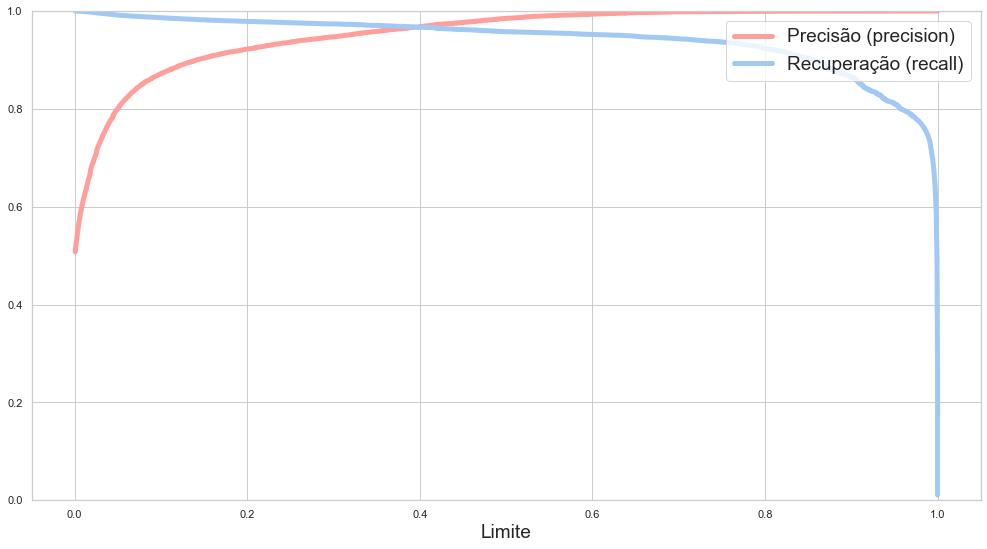

Precisão (Precision): 0.9762439711212966
Recuperação (Recall): 0.9539533386025


In [53]:
# mede a precisão e a recuperação do modelo

# importa bibliotecas de Precision e Recall

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

# Obtendo as probabilidades de nossas previsões

y_scores = xgb_model.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

# plota gráfico de precisão e recuperação

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precisão (precision)", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recuperação (recall)", linewidth=5)
    plt.xlabel("Limite", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(17, 9))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

print("Precisão (Precision):", precision_score(y_train, predictions_cm))
print("Recuperação (Recall):",recall_score(y_train, predictions_cm))

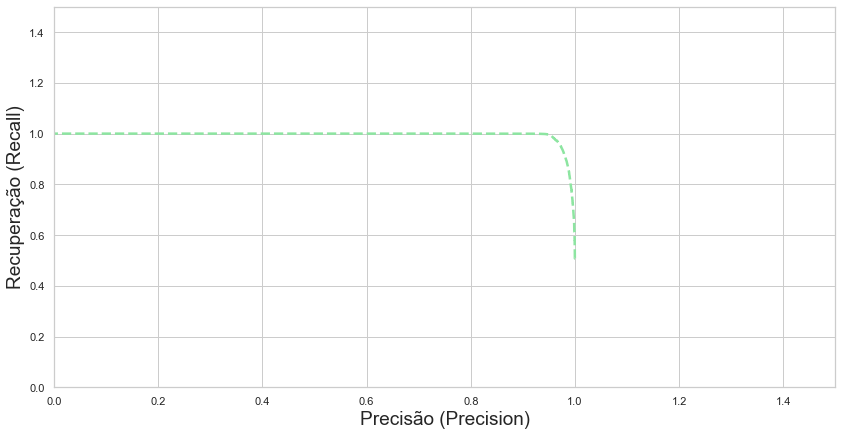

In [54]:
# plota gráfico Recall x Precision

def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("Recuperação (Recall)", fontsize=19)
    plt.xlabel("Precisão (Precision)", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

Agora iremos plotar a Curva Característica de Operação do Receptor (Receiver Operating Characteristic Curve - ROC) e calcular a Área abaixo da Curva Característica de Operação do Receptor (Area under ROC Curve - AUC).

Uma curva ROC é um gráfico que mostra o desempenho de um modelo de classificação em todos os limiares de classificação. Esta curva representa dois parâmetros:

- Taxa de verdadeiro positivo (Sensibilidade) no eixo *y*, nos diz qual proporção de verdadeiros positivos;
- Taxa de falso positivo (1 - Especificidade) no eixo *x*, nos diz qual proporção de falsos positivos.

A linha diagonal em vermelho mostra os pontos onde a taxa de verdadeiro positivo é igual à taxa de falso positivo. Em qualquer ponto desta linha, temos que a proporção de verdadeiros positivos é igual à proporção de falsos positivos.

A AUC fornece uma medida agregada de desempenho em todos os limiares de classificação possíveis. É uma forma de comparar o desempenho entre diferentes modelos. Quanto maior a AUC, melhor será o modelo em distinguir entre clientes satisfeitos e insatisfeitos.

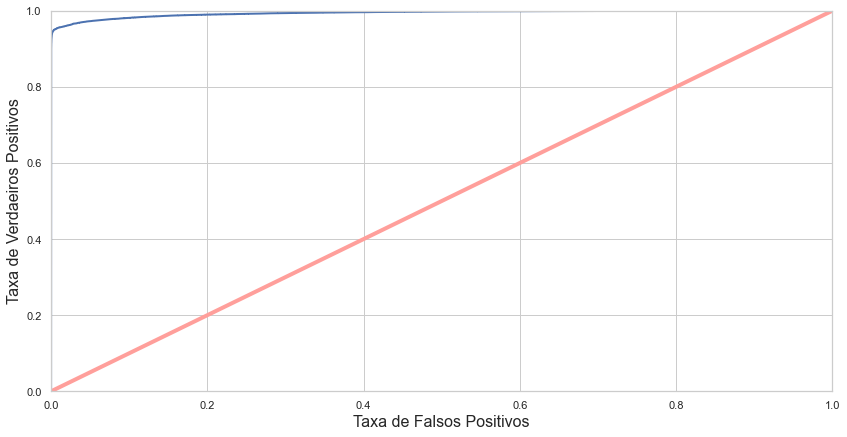

AUC: 0.9937628373744953


In [55]:
# mede ROC e AUC

# importa biblioteca de curva ROC

from sklearn.metrics import roc_curve, roc_auc_score

# calcular taxa positiva verdadeira e taxa de falsos positivos

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

# plotando a Curva ROC

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Taxa de Falsos Positivos', fontsize=16)
    plt.ylabel('Taxa de Verdaeiros Positivos', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# calculando AUC

r_a_score = roc_auc_score(y_train, y_scores)
print("AUC:", r_a_score)

## 6. Gerando arquivo para envio ao Kaggle

In [56]:
Submission = pd.DataFrame({ 'ID': testID, 'TARGET': predictions[:,1] })

In [57]:
# gerando arquivo csv para envio
Submission.to_csv("submission.csv", index=False)

Submission.head()

,ID,TARGET
0,2,0.071559
1,5,0.052759
2,6,0.001590
3,7,0.031130
4,9,0.001041
